In [52]:
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy
import itertools
from scipy import linalg
import matplotlib as mpl

from sklearn import mixture
import gmr
from gmr.utils import check_random_state



%matplotlib inline


In [53]:
from matplotlib.patches import Ellipse
from itertools import cycle
colors = ['r','v','b']
def plot_ellipses(ax,gmm,colors=None,X=None):
    if colors is not None:
        colors = cycle(colors)
    else :
        colors = cycle(["r", "g", "b"])
    for factor in np.linspace(0.5, 4.0, 8):
        for i, (mean, covar, color) in enumerate(zip(gmm.means_, gmm._get_covars(), color_iter)):
            
            #if not np.any(Y_ == i):
            #    continue
            #plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)
            ## valeur propre, vecteur propre
            v, w = linalg.eigh(covar)
            u = w[0] / linalg.norm(w[0])
            angle = np.arctan(u[1] / u[0])
            angle = 180 * angle / np.pi  # convert to degrees
            width, height = factor * np.sqrt(v)
                   
            ell = Ellipse(xy=mean, width=width, height=height,
                          angle=angle)
            ell.set_alpha(0.25)
            if colors is not None:
                ell.set_color(next(colors))
            ax.add_artist(ell)


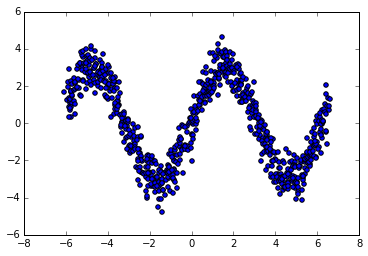

In [52]:
#from sklearn.externals.six.moves import xrange

# Number of samples per component
n_samples = 800

# Generate random sample following a sine curve
np.random.seed(0)
X = np.zeros((n_samples, 2))

step = 4 * np.pi / n_samples

for i in xrange(X.shape[0]):
    x = i * step - 6
    X[i, 0] = x + np.random.normal(0, 0.1)
    X[i, 1] = 3 * (np.sin(x) + np.random.normal(0, .2))
    
plt.scatter(X[:,0],X[:,1])

([], <a list of 0 Text yticklabel objects>)

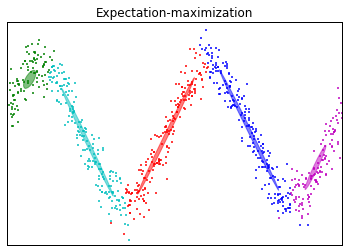

In [37]:
color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])

title = 'Expectation-maximization'
clf = mixture.GMM(n_components=5, covariance_type='full', n_iter=100)
clf.fit(X)
Y_ = clf.predict(X)
splot = plt.subplot(1,1,1)

for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf._get_covars(), color_iter)):
        ## valeur propre, vecteur propre
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, 2*v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

plt.xlim(-6, 4 * np.pi - 6)
plt.ylim(-5, 5)
plt.title(title)
plt.xticks(())
plt.yticks(())

 

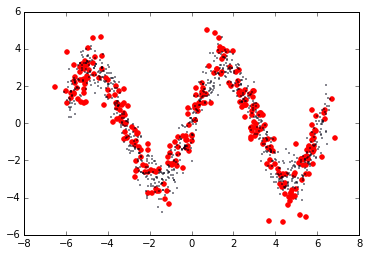

In [13]:
sample = clf.sample(300)
plt.scatter(sample[:, 0], sample[:, 1], color='red')
plt.scatter(X[:, 0], X[:, 1],0.3)


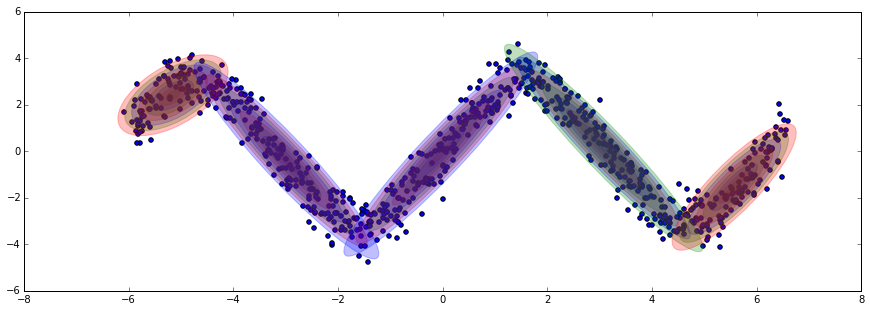

In [51]:

plt.figure(figsize=(15, 5))
plot_ellipses(plt.gca(), clf)
plt.scatter(X[:, 0], X[:, 1])

        

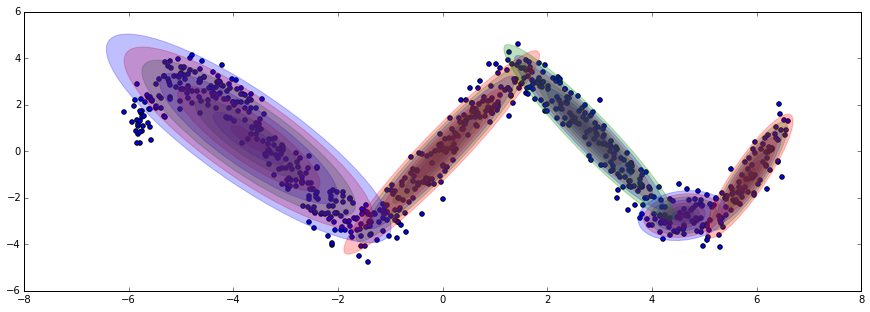

In [49]:
from gmr import GMM, plot_error_ellipses

random_state = check_random_state(0)
gmm = gmr.GMM(n_components=5, random_state=random_state)
gmm.from_samples(X)
plt.figure(figsize=(15, 5))
plot_error_ellipses(plt.gca(), gmm, colors=["r", "g", "b"])
plt.scatter(X[:, 0], X[:, 1])



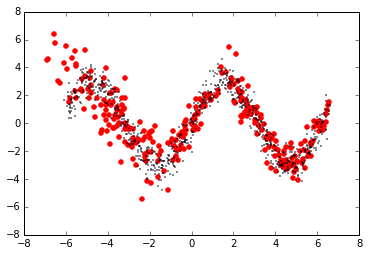

In [67]:
sample = gmm.sample(300)
plt.scatter(sample[:, 0], sample[:, 1], color='red')
plt.scatter(X[:, 0], X[:, 1],0.3)



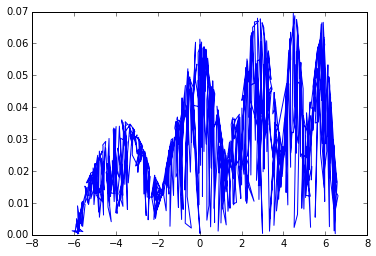

In [71]:
gmm.to_probability_density(X)
plt.plot(X[:,0],gmm.to_probability_density(X))


In [ ]:
gmm.to